# Deliverables:

- Submit two files that has the name: YourLastName_Exercise_4:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output
 3. You may zip these 2 files and submit


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [1]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

%matplotlib inline
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

### Lets ead the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

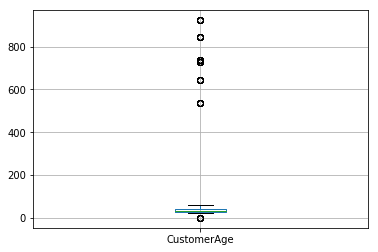

In [4]:
# check out customer age
dirtydata4bestdeal.boxplot(column='CustomerAge');


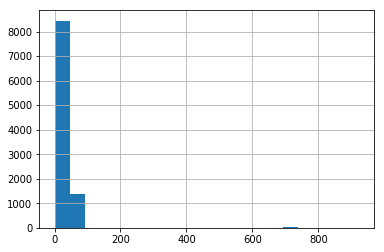

In [5]:
# check out customer age with a histogram
dirtydata4bestdeal['CustomerAge'].hist(bins=20);

In [6]:
# look at details of LenenovaLaptop
dirtydata4bestdeal.LenevoLaptop.describe()

count    9976.000000
mean        0.629711
std         0.627375
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: LenevoLaptop, dtype: float64

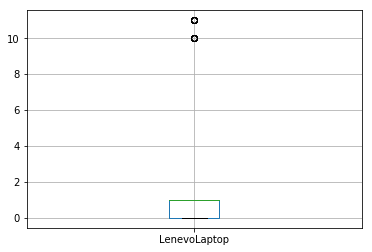

In [7]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop');

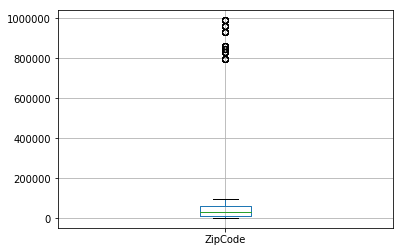

In [8]:
# look at zip codes
dirtydata4bestdeal.boxplot(column='ZipCode');

### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [9]:
dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


In [10]:
dirtydata4bestdeal.shape

(10000, 34)

In [11]:
# ----------------------------------------------------------------------------------

# Add the rest of your code here to clean the data

# steps you must take
# - eliminate NA's
# - product values should only be either a 0 or a 1
# - customer's age needs to be valid
# - zipcodes should have at least 5 digits

# Optional steps
# - if there are other things you want to clean, clearly document them
#   and run them in this section before you create a database


# ----------------------------------------------------------------------------------




In [12]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [13]:
cleandata4bestdeal.shape

(9432, 34)

In [14]:
# convert objects and floats into integers
cleandata4bestdeal['SonyTV42LED'] = pd.to_numeric(cleandata4bestdeal['SonyTV42LED'], errors='coerce').fillna(0).astype(int)
cleandata4bestdeal['XBOX360'] = pd.to_numeric(cleandata4bestdeal['XBOX360'], errors='coerce').fillna(0).astype(int)
cleandata4bestdeal['DellLaptop'] = pd.to_numeric(cleandata4bestdeal['DellLaptop'], errors='coerce').fillna(0).astype(int)
cleandata4bestdeal['BoseSoundSystem'] = pd.to_numeric(cleandata4bestdeal['BoseSoundSystem'], errors='coerce').fillna(0).astype(int)

cleandata4bestdeal = cleandata4bestdeal.astype('int32')

In [15]:
# product values should only be either a 0 or a 1
##cleandata4bestdeal.loc[:,'SamsungTV46LED':'TVStandWallMount'] = \
##cleandata4bestdeal.loc[:,'SamsungTV46LED':'TVStandWallMount']\
##[cleandata4bestdeal.loc[:,'SamsungTV46LED':'TVStandWallMount']\
##.isin([0, 1])].fillna(0).astype(int)

cleandata4bestdeal = \
cleandata4bestdeal[(cleandata4bestdeal.iloc[:,2:] <= 1).all(1)]

In [16]:
cleandata4bestdeal.shape

(9206, 34)

In [17]:
cleandata4bestdeal.loc[:,'SamsungTV46LED':'TVStandWallMount'].apply(pd.value_counts)

,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,iPhone,Panasonic50LED,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3067,1762,1742,4436,4763,4501,1490,7620,5924,7018,...,2814,8567,NaN,4717,2984,2537,6066,3821,3518,2659
1,6139,7444,7464,4770,4443,4705,7716,1586,3282,2188,...,6392,639,9206.0,4489,6222,6669,3140,5385,5688,6547


In [18]:
#There are ages zero and over 500; which are invalid
cleandata4bestdeal.loc[:,'CustomerAge'].value_counts().sort_index()

0        8
21     201
22     267
23     735
24     184
25     472
26     343
27     505
28     494
29     462
30      16
31     210
32     184
33     168
34     480
35     373
36     192
37     511
38     457
39     104
41      96
42     183
43     464
44     528
45     128
46     151
47     104
49     184
51      81
53      24
54     296
55      66
56     184
57     144
59     119
61      32
536      8
643      8
727      8
737     16
843      8
923      8
Name: CustomerAge, dtype: int64

In [19]:
#customer's age needs to be valid

cleandata4bestdeal_1 = cleandata4bestdeal[
    cleandata4bestdeal['CustomerAge'].between(20,100)]

cleandata4bestdeal_1.loc[:,'CustomerAge'].value_counts().sort_index()

21    201
22    267
23    735
24    184
25    472
26    343
27    505
28    494
29    462
30     16
31    210
32    184
33    168
34    480
35    373
36    192
37    511
38    457
39    104
41     96
42    183
43    464
44    528
45    128
46    151
47    104
49    184
51     81
53     24
54    296
55     66
56    184
57    144
59    119
61     32
Name: CustomerAge, dtype: int64

In [20]:
# zipcodes should have at least 5 digits

cleandata4bestdeal.loc[:,'ZipCode'].astype('int').value_counts().sort_index()

2108       613
2109       930
2110       224
10065      762
30134     1141
30303      985
33129      539
33130      280
44114      510
60532      243
60585      240
60603      224
60611       62
60616      960
62791        3
90024      144
90033      639
94102      164
94158      495
794158       8
830134       8
844114       8
860616       8
960616       8
990033       8
Name: ZipCode, dtype: int64

In [21]:
#zipcodes should have at least 5 digits

cleandata4bestdeal_2 = cleandata4bestdeal_1[
    cleandata4bestdeal_1['ZipCode'] < 100000]
cleandata4bestdeal_2['ZipCode'].value_counts().sort_index()

2108      613
2109      918
2110      224
10065     750
30134    1133
30303     985
33129     531
33130     280
44114     510
60532     243
60585     240
60603     224
60611      62
60616     952
62791       3
90024     144
90033     631
94102     164
94158     487
Name: ZipCode, dtype: int64

In [22]:
# check the df shape after cleaning the data

print(cleandata4bestdeal.shape)
print(cleandata4bestdeal_2.shape)

(9206, 34)
(9094, 34)


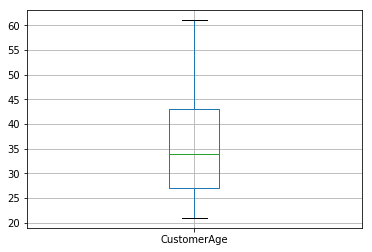

In [23]:
# after cleaning the customer age - does the boxplot still show outliers?
# how does the histogram look?
# if this does not look better - you are not ready to proceed
cleandata4bestdeal_2.boxplot(column='CustomerAge');

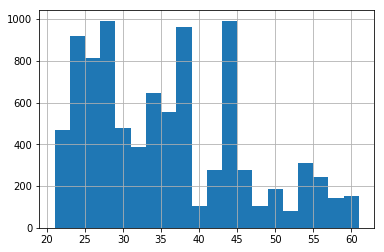

In [24]:
cleandata4bestdeal_2['CustomerAge'].hist(bins=20);

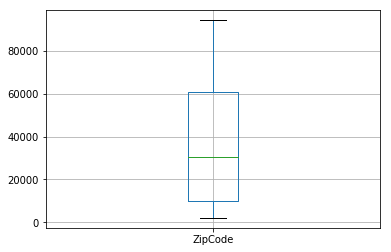

In [25]:
# boxplot after cleaning the zip code

cleandata4bestdeal_2.boxplot(column='ZipCode');

### Lets store the cleaned data into the Database

In [26]:
# how many records did you end up with after the data cleaning?
cleandata4bestdeal = cleandata4bestdeal_2
cleandata4bestdeal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 0 to 9999
Data columns (total 34 columns):
ZipCode               9094 non-null int32
CustomerAge           9094 non-null int32
SamsungTV46LED        9094 non-null int32
SonyTV42LED           9094 non-null int32
XBOX360               9094 non-null int32
DellLaptop            9094 non-null int32
BoseSoundSystem       9094 non-null int32
BoseHeadSet           9094 non-null int32
SonyHeadSet           9094 non-null int32
iPod                  9094 non-null int32
iPhone                9094 non-null int32
Panasonic50LED        9094 non-null int32
SonyPS4               9094 non-null int32
WiiU                  9094 non-null int32
WDexternalHD          9094 non-null int32
SamsungTV55LED        9094 non-null int32
SonyTV60LED           9094 non-null int32
SandiskMemoryCard     9094 non-null int32
SonySoundSystem       9094 non-null int32
SonyCamera            9094 non-null int32
PanasonicCamera       9094 non-null int32
HPPrinter  

In [27]:
# now that your data has been cleaned, lets store it in a database

# NOTE - if you run this code more than once, the database will exist and this section will fail
# NOTE - to run this more than once, you need to delete the database first
#      OR - change the database name to create a new database

engine = create_engine('sqlite:///bestdeal1.db')

In [28]:
cleandata4bestdeal.to_sql('trans4cust', engine)

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [29]:
insp=inspect(engine)

In [30]:
 insp.get_table_names()

['trans4cust']

In [31]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [32]:
# ======================================================================
# **********************************************************************
# 
# WARNING - this pre-run notebook is using dirty data
# WARNING - after cleaning the data, your output should look different
#
# ======================================================================
# **********************************************************************

In [33]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [34]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616,56,0,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,16,60616,43,0,1,1,0,1,0,1,...,1,0,1,1,1,1,0,1,1,1
2,18,60616,54,1,0,0,1,0,1,1,...,0,1,1,0,1,1,0,1,1,1
3,23,60616,43,1,1,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,1
4,34,60616,31,0,1,1,1,0,0,1,...,1,0,1,1,1,1,1,0,0,1


#### Query example #2: get the transactions for ALL customers

In [35]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * \
    FROM trans4cust", engine)

In [36]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134,35,1,1,1,0,0,1,1,...,1,0,1,1,1,1,0,1,1,1
1,1,62791,43,0,1,0,0,1,0,1,...,1,0,1,0,1,1,0,1,1,1
2,3,60616,56,0,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,6,90033,44,1,1,1,1,0,0,0,...,1,1,1,1,0,1,1,0,0,1
4,9,2109,37,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [37]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' \
            FROM trans4cust \
            GROUP BY ZipCode \
            ORDER BY ZipCode", engine)

In [38]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108,613
1,2109,918
2,2110,224
3,10065,750
4,30134,1133
5,30303,985
6,33129,531
7,33130,280
8,44114,510
9,60532,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [39]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE ZipCode=60616 \
    GROUP BY CustomerAge  \
    ORDER BY CustomerAge", engine)

In [40]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48
5,27,32
6,28,32
7,29,56
8,31,16
9,32,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [41]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust \
    WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust \
    WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [42]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108,402
1,2109,579
2,10065,439
3,30134,757
4,30303,517
5,60616,689


In [43]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109,424
1,30134,799
2,30303,464
3,60616,466
4,90033,404


In [44]:
SonyTV60LEDCustTrans.ZipCode

0     2108
1     2109
2    10065
3    30134
4    30303
5    60616
Name: ZipCode, dtype: int64

In [45]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))

sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0
        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


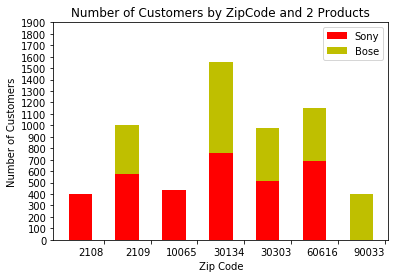

In [46]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(sony_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): show the top 3 zip codes with the most customers 
2. (Use SQL/SQlite): selecting the customers from the top 3 zip codes (results from question 1), what are ages of the customers? Sort output by most customers. You can show all 3 zip codes combined or show ages by zip codes.
3. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge.
4. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360).
5. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD).


In [47]:
# Write your python code that meets the above requirements in this cell
# Question 1
# (Use SQL/SQlite): show the top 3 zip codes with the most customers 

Ans_1 = pd.read_sql_query(
    "SELECT ZipCode, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    GROUP BY ZipCode \
    ORDER BY num_customers DESC\
    Limit 3;", engine)
Ans_1

,ZipCode,num_customers
0,30134,1133
1,30303,985
2,60616,952


In [48]:
# Question 2
# (Use SQL/SQlite): selecting the customers from the top 3 zip codes 
# (results from question 1), what are ages of the customers? 
# Sort output by most customers. You can show all 3 zip codes combined 
# or show ages by zip codes.

Ans_2 = pd.read_sql_query(
    "SELECT ZipCode, CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE ZipCode in (30134, 30303, 60616)\
    GROUP BY ZipCode, CustomerAge \
    ORDER BY num_customers DESC", engine)
Ans_2

,ZipCode,CustomerAge,num_customers
0,30134,25,154
1,60616,34,96
2,60616,25,88
3,60616,44,88
4,30134,29,84
5,30303,26,83
6,30303,27,81
7,30303,44,77
8,30134,43,75
9,30134,34,74


In [49]:
# Question 3
# (Use SQL/SQlite): get the number of customers who bought DellLaptop 
# and HPPrinter for every Age group sorted by CustomerAge.

Ans_3 = pd.read_sql_query(
"SELECT CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE DellLaptop = 1\
    AND HPPrinter = 1\
    GROUP BY CustomerAge \
    ORDER BY CustomerAge", engine)
Ans_3 

,CustomerAge,num_customers
0,21,201
1,22,203
2,23,304
3,25,64
4,26,183
5,27,272
6,28,56
7,29,143
8,31,194
9,32,184


In [50]:
# Question 4
# (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 
# (this query means NOT even a single csutomer in that zip code bought XBOX360).

Ans_4 = pd.read_sql_query(
"SELECT ZipCode, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE XBOX360 = 0\
    GROUP BY ZipCode", engine)
Ans_4 

,ZipCode,num_customers
0,2108,49
1,2109,210
2,2110,96
3,10065,164
4,30134,248
5,30303,220
6,33129,67
7,33130,40
8,44114,81
9,60532,32


In [51]:
# Question 5
# (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers
# who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge
# group that has more than 100 customers who bought these two products
# (either bought one of these products or the two products but didn't buy WDexternalHD).

Ans_5 = pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPLaptop = 1 \
    AND HPPrinter = 1 \
    AND WDexternalHD = 0 \
    GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

Ans_5_HPLaptop = pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPLaptop = 1 \
    AND WDexternalHD = 0 \
    GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

Ans_5_HPPrinter = pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPPrinter = 1 \
    AND WDexternalHD = 0 \
    GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

In [52]:
Ans_5_HPLaptop

,CustomerAge,num_customers
0,21,192
1,22,203
2,23,437
3,25,147
4,26,205
5,27,307
6,28,126
7,29,290
8,31,196
9,32,176


In [53]:
Ans_5_HPPrinter

,CustomerAge,num_customers
0,21,192
1,22,193
2,23,437
3,25,147
4,26,205
5,27,288
6,28,126
7,29,290
8,31,196
9,32,176


In [54]:
HPLaptop_cusage = tuple(Ans_5_HPLaptop.CustomerAge.astype(numpy.int))
HPLaptop_cus = tuple(Ans_5_HPLaptop.num_customers.astype(numpy.int))

HPPrinter_cusage = tuple(Ans_5_HPPrinter.CustomerAge.astype(numpy.int))
HPPrinter_cus = tuple(Ans_5_HPPrinter.num_customers.astype(numpy.int))

HPLaptop_dict = dict(zip(HPLaptop_cusage, HPLaptop_cus))
HPPrinter_dict = dict(zip(HPPrinter_cusage, HPPrinter_cus))

for key in HPPrinter_dict.keys():
    if ((key in HPLaptop_dict.keys()) == False): HPLaptop_dict[key]=0
        
for key in HPLaptop_dict.keys():
    if ((key in HPPrinter_dict.keys()) == False): HPPrinter_dict[key]=0
        
HPPrinter_cusage= sorted(HPPrinter_dict.keys())

HPLaptop_cusage= sorted(HPLaptop_dict.keys())

HPPrinter_cusage_tuple=tuple(HPPrinter_cusage)

HPLaptop_cusage_tuple=tuple(HPLaptop_cusage)

HPPrinter_customer_list=[]

for HPPrinter in HPPrinter_cusage_tuple:
    HPPrinter_customer_list.append(HPPrinter_dict[HPPrinter])

HPLaptop_customer_list=[]

for HPLaptop in HPLaptop_cusage_tuple:
    HPLaptop_customer_list.append(HPLaptop_dict[HPLaptop])

HPPrinter_customer_tuple=tuple(HPPrinter_customer_list)
HPLaptop_customer_tuple=tuple(HPLaptop_customer_list)

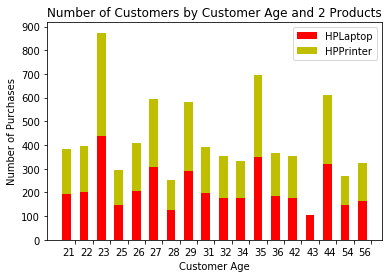

In [55]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(HPLaptop_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = 0.5

p1 = plt.bar(ind, HPLaptop_customer_tuple, width,  color='r')
p2 = plt.bar(ind, HPPrinter_customer_tuple, width, color='y', bottom = HPLaptop_customer_tuple)

plt.ylabel('Number of Purchases')
plt.xlabel('Customer Age')

plt.title('Number of Customers by Customer Age and 2 Products')

plt.xticks(ind + width, HPLaptop_cusage_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('HPLaptop', 'HPPrinter'))

plt.show();